# Data Preparation

Dataset: <a href="https://archive.ics.uci.edu/ml/datasets/wine+quality">Wine Quality</a><br>
Filename: winequality-red.csv & winequality-white.csv


## Import Libraries

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# %matplotlib inline

In [17]:
# Set Options for display
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.2f}'.format

#Filter Warnings
import warnings
warnings.filterwarnings('ignore')

In [18]:
# from scipy.stats import norm
# from scipy import stats

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

________

# Part 2 - Data Quality Assessment

## Load the Dataset
* Specify the Parameters (Filepath, Index Column)
* Check for Date-Time Columns to Parse Dates
* Check Encoding if file does not load correctly

In [20]:
df_red = pd.read_csv("./winequality-red.csv", sep=";")
df_white = pd.read_csv("./winequality-white.csv", sep=";")

View the Dataset

In [21]:
# ADDING wine_color to red wines as 0
wine_color = []
for i in range(0,df_red.quality.count()):
    wine_color.append(0)
df_red['wine_color'] = wine_color

# ADDING wine_color to white wines as 1
wine_color = []
for i in range(0,df_white.quality.count()):
    wine_color.append(1)
df_white['wine_color'] = wine_color

Check the Shape

In [22]:
df_white = df_white[0:df_red.quality.count()]


df = pd.concat([df_red,df_white])
df.shape

(3198, 13)

Set the correct index

In [23]:
# df.set_index('Id', inplace=True)

## Ensure Columns / Features have Proper Labels

In [24]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_color'],
      dtype='object')

In [25]:
correct_col_names = []

# REPLACING SPACE WITH _ FOR PROPER LABEL
for col_name in df.columns:
    splitted_name = col_name.split(' ')
    if len(splitted_name) == 1:
        correct_col_names.append(col_name)
    else:
        joined_name = '_'.join(splitted_name)
        correct_col_names.append(joined_name)

# REASSIGN COLUMN HEADERS
df.columns = correct_col_names

## Ensure Correct Format of Values

In [26]:
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_color                int64
dtype: object

## Remove Duplicates

Check if Index is duplicated

In [27]:
df.duplicated().sum()

491

Check if there are duplicated rows


In [28]:
df[df.duplicated()]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_color
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5,0
11,7.50,0.50,0.36,6.10,0.07,17.00,102.00,1.00,3.35,0.80,10.50,5,0
27,7.90,0.43,0.21,1.60,0.11,10.00,37.00,1.00,3.17,0.91,9.50,5,0
40,7.30,0.45,0.36,5.90,0.07,12.00,87.00,1.00,3.33,0.83,10.50,5,0
65,7.20,0.72,0.05,4.65,0.09,4.00,11.00,1.00,3.41,0.39,10.90,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,7.40,0.30,0.49,8.20,0.06,49.00,188.00,1.00,3.52,0.58,9.70,6,1
1583,6.40,0.18,0.74,11.90,0.05,54.00,168.00,1.00,3.58,0.68,10.10,5,1
1587,6.40,0.25,0.74,7.80,0.04,52.00,209.00,1.00,3.21,0.42,9.20,6,1
1588,7.30,0.30,0.74,13.50,0.04,46.00,165.00,1.00,3.02,0.40,8.70,5,1


Remove the duplicates if any

In [29]:
df.drop_duplicates(inplace=True)

## Handle Missing Data

Check for missing data

In [30]:
#Gets the total number of missing data
total = df.isnull().sum().sort_values(ascending=False)


In [31]:
#Get % of Null
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)

In [32]:
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data.head(20)

,Total,Percent
fixed_acidity,0,0.00
volatile_acidity,0,0.00
citric_acid,0,0.00
residual_sugar,0,0.00
chlorides,0,0.00
free_sulfur_dioxide,0,0.00
total_sulfur_dioxide,0,0.00
density,0,0.00
pH,0,0.00
sulphates,0,0.00


In [33]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_color
count,2707.00,2707.00,2707.00,2707.00,2707.00,2707.00,2707.00,2707.00,2707.00,2707.00,2707.00,2707.00,2707.00
mean,7.66,0.41,0.32,4.13,0.07,25.19,94.67,1.00,3.26,0.57,10.38,5.74,0.50
std,1.53,0.19,0.18,3.89,0.04,16.75,62.26,0.00,0.16,0.17,1.10,0.90,0.50
min,4.60,0.08,0.00,0.80,0.01,1.00,6.00,0.99,2.74,0.25,8.40,3.00,0.00
25%,6.70,0.26,0.21,1.80,0.04,12.00,37.00,0.99,3.15,0.46,9.50,5.00,0.00
50%,7.30,0.36,0.32,2.30,0.06,22.00,89.00,1.00,3.26,0.55,10.10,6.00,0.00
75%,8.30,0.54,0.43,5.00,0.08,35.00,143.00,1.00,3.37,0.65,11.10,6.00,1.00
max,15.90,1.58,1.66,22.00,0.61,131.00,366.50,1.00,4.01,2.00,14.90,9.00,1.00


In [34]:
df.shape

(2707, 13)

_______

# Part 3 - Exploratory Data Analysis

Get the statistics for numerical data

In [35]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_color
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5,0
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5,0
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5,0
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6,0
5,7.40,0.66,0.00,1.80,0.07,13.00,40.00,1.00,3.51,0.56,9.40,5,0


In [36]:
#Quality
df['quality'].value_counts()

6    1106
5     982
7     406
4     116
8      73
3      20
9       4
Name: quality, dtype: int64

______

<AxesSubplot:>

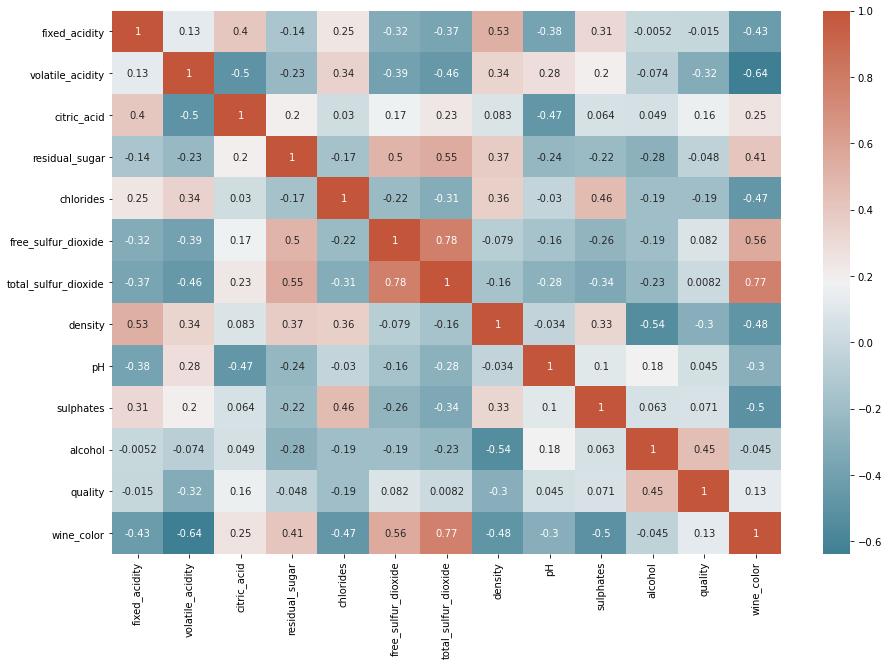

In [37]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

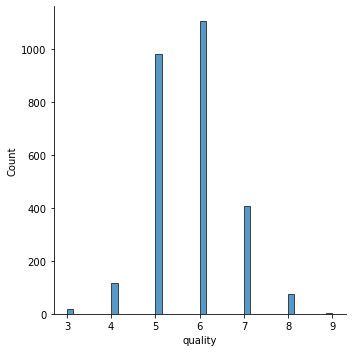

In [38]:
sns.displot(df['quality'])

<AxesSubplot:xlabel='quality'>

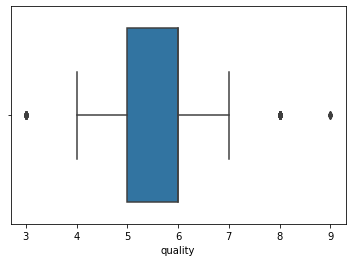

In [39]:
sns.boxplot(df['quality'])

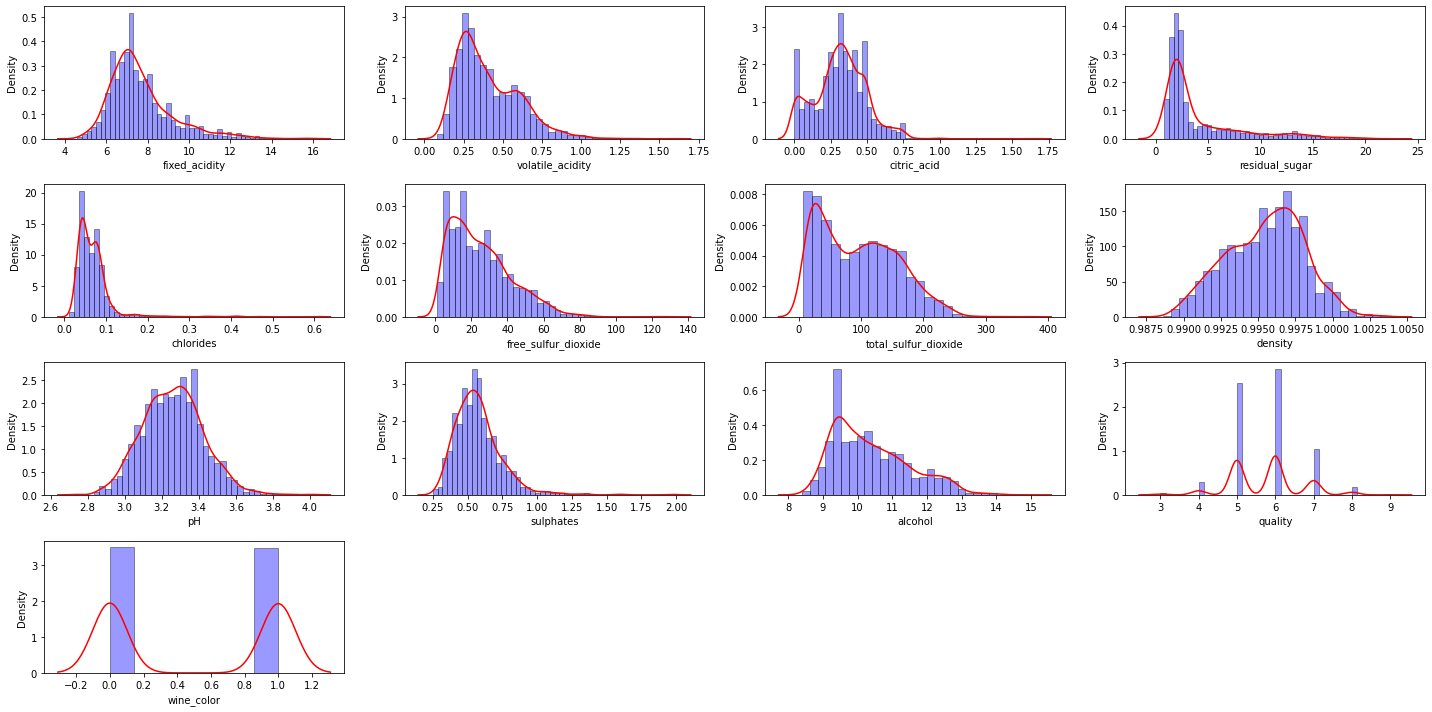

In [40]:
fig = plt.figure(figsize= [20, 10])
cols = df.columns
cnt = 1
for col in cols:
    plt.subplot(5,3,cnt)
    sns.distplot(df[col],hist_kws=dict(edgecolor='k', linewidth=1, color='blue'), color='red')
    cnt+=1
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Wine Quality as explained by Fixed Acidity')

<Figure size 720x432 with 0 Axes>

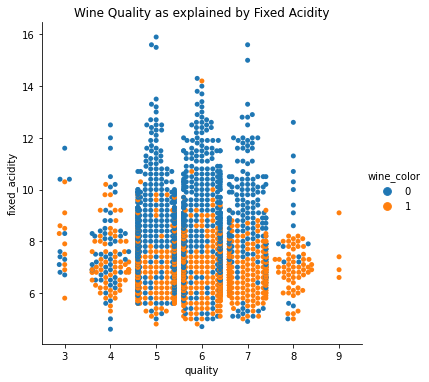

In [41]:
# get some idea of the data
figure = plt.figure(figsize = (10,6))
sns.catplot(x="quality", y="fixed_acidity", hue="wine_color", kind="swarm", data=df)
plt.title("Wine Quality as explained by Fixed Acidity")

In [42]:
def isGoodQuality(quality):
    return 1 if quality >= 7 else 0


# Create Classification version of target variable
df['good_quality'] = df['quality'].apply(isGoodQuality)
df.good_quality.value_counts()

# Separate feature variables and target variable
X_quality = df.drop(['quality', 'good_quality'], axis = 1)
y_quality = df['good_quality']


In [43]:
X_quality

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,wine_color
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,0
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,0
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,0
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,0
5,7.40,0.66,0.00,1.80,0.07,13.00,40.00,1.00,3.51,0.56,9.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,8.60,0.16,0.49,7.30,0.04,9.00,63.00,1.00,3.13,0.59,10.50,1
1594,7.00,0.29,0.49,3.80,0.05,37.00,136.00,0.99,2.95,0.40,9.40,1
1595,6.40,0.27,0.49,7.30,0.05,53.00,206.00,1.00,3.24,0.43,9.20,1
1596,6.60,0.55,0.01,2.70,0.03,56.00,122.00,0.99,3.15,0.30,11.90,1


In [44]:
y_quality.value_counts()

0    2224
1     483
Name: good_quality, dtype: int64

In [45]:
# Normalize feature variables
X_features = X_quality
X = StandardScaler().fit_transform(X_quality)

In [46]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y_quality, test_size=.3, random_state=25)

In [47]:
#decsion tree
dtc_model = DecisionTreeClassifier(random_state=1)
dtc_model.fit(X_train, y_train)
dtc_pred = dtc_model.predict(X_test)
print(classification_report(y_test, dtc_pred))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       673
           1       0.41      0.49      0.44       140

    accuracy                           0.79       813
   macro avg       0.65      0.67      0.66       813
weighted avg       0.81      0.79      0.80       813



In [48]:
#decsion tree
dtc_model = DecisionTreeClassifier(random_state=25)
dtc_model.fit(X_train, y_train)
dtc_pred = dtc_model.predict(X_test)
print(classification_report(y_test, dtc_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88       673
           1       0.43      0.51      0.47       140

    accuracy                           0.80       813
   macro avg       0.66      0.68      0.67       813
weighted avg       0.81      0.80      0.81       813



In [49]:
print("Confusion matrix:\n%s" % confusion_matrix(y_test, dtc_pred))

Confusion matrix:
[[580  93]
 [ 69  71]]


Text(0.5, 42.0, 'Predicted label')

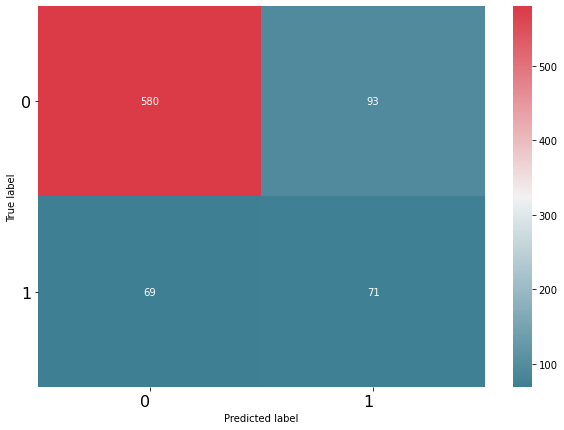

In [50]:
#dito natin makikita yung confusion matrix 

#Plot the confusion matrix for easier viewing
cm = confusion_matrix(y_test, dtc_pred)

df_cm = pd.DataFrame(cm, index=[0,1], columns=[0,1])

fig = plt.figure(figsize= (10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
heatmap = sns.heatmap(df_cm,annot=True, fmt="d", cmap=cmap)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [64]:
#random forest
rfc_model = RandomForestClassifier(random_state=1)
rfc_model.fit(X_train, y_train)
rfc_pred = rfc_model.predict(X_test)
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       673
           1       0.72      0.45      0.56       140

    accuracy                           0.88       813
   macro avg       0.81      0.71      0.74       813
weighted avg       0.86      0.88      0.86       813



Text(0.5, 42.0, 'Predicted label')

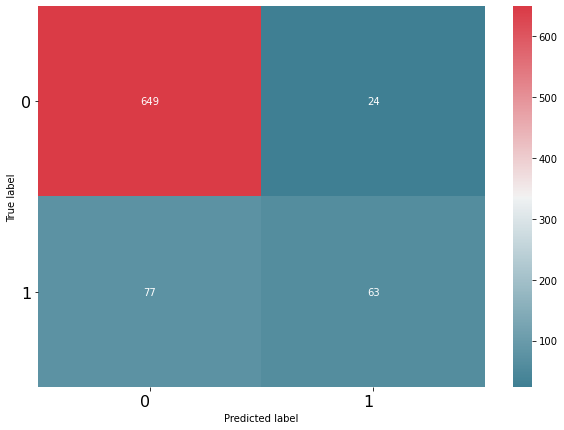

In [65]:
#dito natin makikita yung confusion matrix 

#Plot the confusion matrix for easier viewing
cm = confusion_matrix(y_test, rfc_pred)

df_cm = pd.DataFrame(cm, index=[0,1], columns=[0,1])

fig = plt.figure(figsize= (10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
heatmap = sns.heatmap(df_cm,annot=True, fmt="d", cmap=cmap)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

## Feature Importance

Decision Tree Classifier Feature Importance


<AxesSubplot:>

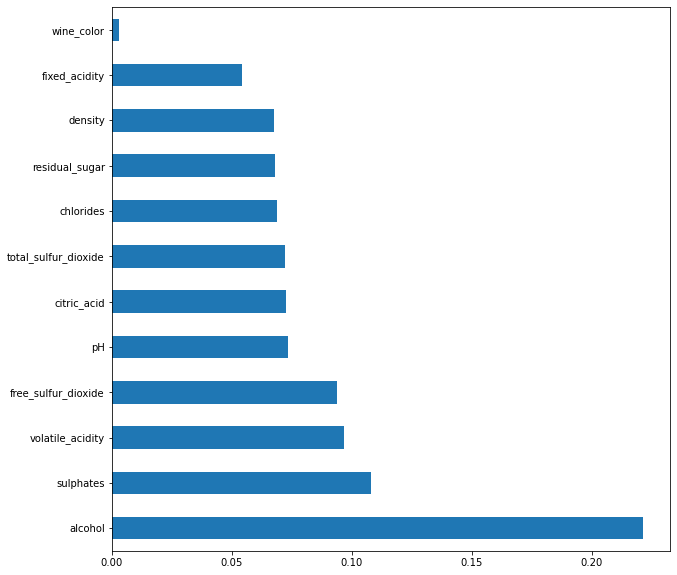

In [52]:
print('Decision Tree Classifier Feature Importance')
feat_importances = pd.Series(dtc_model.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

Random Tree Classifier Feature Importance


<AxesSubplot:>

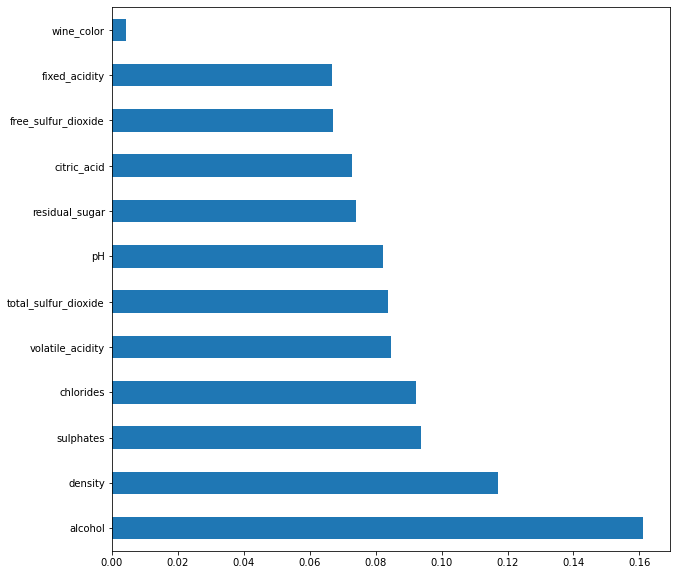

In [53]:
print('Random Tree Classifier Feature Importance')
feat_importances = pd.Series(rfc_model.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

In [54]:
print('Decision Tree')
print(classification_report(y_test, dtc_pred))

print('---------------------------------------------------------------------------------')
print('Random Forest')
print(classification_report(y_test, rfc_pred))

Decision Tree
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       673
           1       0.43      0.51      0.47       140

    accuracy                           0.80       813
   macro avg       0.66      0.68      0.67       813
weighted avg       0.81      0.80      0.81       813

---------------------------------------------------------------------------------
Random Forest
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       673
           1       0.72      0.45      0.56       140

    accuracy                           0.88       813
   macro avg       0.81      0.71      0.74       813
weighted avg       0.86      0.88      0.86       813



In [55]:
# Filtering df for only good quality
df_temp = df[df['good_quality']==1]
print('Good Quality Wines')
df_temp.describe()

Good Quality Wines


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_color,good_quality
count,483.00,483.00,483.00,483.00,483.00,483.00,483.00,483.00,483.00,483.00,483.00,483.00,483.00,483.00
mean,7.65,0.32,0.36,3.71,0.05,26.03,92.57,0.99,3.27,0.59,11.37,7.17,0.62,1.00
std,1.65,0.13,0.14,3.12,0.03,15.46,55.64,0.00,0.15,0.18,1.10,0.40,0.49,0.00
min,4.90,0.08,0.00,0.90,0.01,3.00,7.00,0.99,2.88,0.25,8.50,7.00,0.00,1.00
25%,6.60,0.23,0.31,1.77,0.04,12.00,35.00,0.99,3.16,0.44,10.60,7.00,0.00,1.00
50%,7.30,0.30,0.36,2.40,0.04,25.00,101.00,0.99,3.27,0.57,11.40,7.00,1.00,1.00
75%,8.25,0.38,0.44,4.72,0.07,36.00,133.00,1.00,3.37,0.73,12.30,7.00,1.00,1.00
max,15.60,0.92,0.76,17.00,0.36,82.00,289.00,1.00,3.82,1.36,14.00,9.00,1.00,1.00


In [56]:
# Filtering df for only bad quality
df_temp2 = df[df['good_quality']==0]
print('Bad Quality Wines')
df_temp2.describe()

Bad Quality Wines


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_color,good_quality
count,2224.00,2224.00,2224.00,2224.00,2224.00,2224.00,2224.00,2224.00,2224.00,2224.00,2224.00,2224.00,2224.00,2224.00
mean,7.66,0.42,0.31,4.22,0.07,25.01,95.13,1.00,3.26,0.57,10.17,5.43,0.47,0.00
std,1.51,0.20,0.18,4.04,0.05,17.02,63.61,0.00,0.16,0.17,0.97,0.63,0.50,0.00
min,4.60,0.08,0.00,0.80,0.02,1.00,6.00,0.99,2.74,0.25,8.40,3.00,0.00,0.00
25%,6.70,0.26,0.19,1.80,0.04,12.00,38.00,0.99,3.14,0.46,9.40,5.00,0.00,0.00
50%,7.30,0.39,0.30,2.30,0.06,21.00,86.00,1.00,3.26,0.55,10.00,5.00,0.00,0.00
75%,8.30,0.57,0.43,5.10,0.08,34.00,146.00,1.00,3.36,0.64,10.80,6.00,1.00,0.00
max,15.90,1.58,1.66,22.00,0.61,131.00,366.50,1.00,4.01,2.00,14.90,6.00,1.00,0.00


_______

# Combine all the prepared dataframes

In [57]:
# df_list = [df_num_scaled, df_cat, df_target]

# df_final = pd.concat(df_list, axis = 1)

In [58]:
# df_final.head()

In [59]:
# df_final.columns

In [60]:
# df_final.shape

## Save final DataFrame as a csv file

In [61]:
# df_final.to_csv('./Output/c2_titanic_Output1.csv')

### Check if it loads correctly

In [62]:
# df_check = pd.read_csv('./Output/c2_titanic_Output1.csv', index_col='PassengerId')

In [63]:
# df_check.head()